# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [28]:
df = pd.read_csv('df_telecom_pre_processamento_2.csv', delimiter=',')
df.head(10)

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,Streaming_TV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,feminino,nao,sim,nao,1,nao,dsl,nao,nao,nao,mes a mes,cheque eletronico,29.850000,29.85,nao
1,masculino,nao,nao,nao,34,sim,dsl,sim,nao,nao,um ano,cheque enviado,56.950000,1889.50,nao
2,masculino,nao,nao,nao,2,sim,dsl,sim,nao,nao,mes a mes,cheque enviado,53.850000,108.15,sim
3,masculino,nao,nao,nao,45,nao,dsl,sim,sim,nao,um ano,transferencia bancaria automatica,65.607563,1840.75,nao
4,feminino,nao,nao,nao,52,sim,nao,nao,nao,nao,um ano,cheque enviado,65.607563,1022.95,nao
5,masculino,nao,nao,sim,71,sim,fibra otica,sim,nao,sim,dois anos,transferencia bancaria automatica,65.607563,7382.25,nao
6,feminino,nao,sim,sim,10,sim,dsl,nao,sim,nao,mes a mes,cartao de credito automatico,65.607563,528.35,sim
7,feminino,nao,nao,nao,21,sim,fibra otica,nao,nao,nao,mes a mes,cheque eletronico,65.607563,1862.90,nao
8,masculino,sim,nao,nao,1,nao,dsl,nao,nao,nao,mes a mes,cheque eletronico,65.607563,39.65,sim
9,masculino,nao,sim,nao,12,sim,nao,nao,nao,nao,um ano,transferencia bancaria automatica,65.607563,202.25,nao


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [29]:
df.describe()

,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago
count,2488.000000,2488.000000,2488.000000
mean,32.352090,65.607563,2290.087178
std,24.636885,27.984700,2264.585643
min,0.000000,18.400000,18.800000
25%,8.000000,45.400000,402.337500
50%,29.000000,65.607563,1402.900000
75%,56.000000,87.712500,3867.162500
max,72.000000,118.650000,8564.750000


#### Identifiquei que a variável "Total_Pago" possui uma disperção de valores em relação a média, comparando a média e mediana (50%) consegui identificar que existem dados elevando o valor da média, oberservando o valor mínimo de 18,80 e o valor máximo de 8.564,75 confirmamos a análise. Entendi que os valores que estão elevando o valor da média não foi digitado errado ou que seja um valor dispensável, por esse motivo irei isolar esses valores para não enviesar, oberservei que quanto maior o tempo como cliente maior é o pagamento mensal dos clientes e com isso aumentando o total pago.

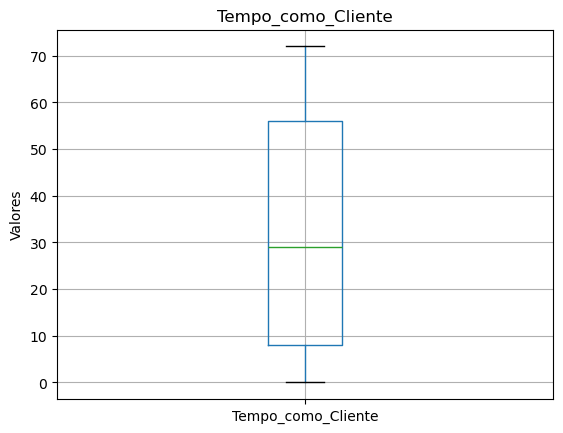

In [30]:
df.boxplot(column='Tempo_como_Cliente')
plt.title('Tempo_como_Cliente')
plt.ylabel('Valores')
plt.show()

#### O gráfico plotado acima me mostra que os valores da variável "Tempo_como_Cliente" estão bem distribuídos e não possuem ouliers.

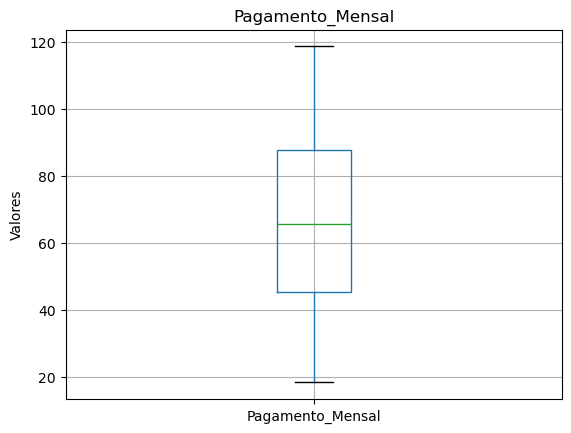

In [31]:
df.boxplot(column='Pagamento_Mensal')
plt.title('Pagamento_Mensal')
plt.ylabel('Valores')
plt.show()

#### O gráfico plotado acima me mostra que os valores da variável "Pagamento_Mensal" estão muito bem distribuídos e não possuem ouliers. Além do gráfico analisando a média e a mediana da variável identifiquei que possuem valores identicos, ou seja possuo uma distribuição normal nos dados dessa variável.

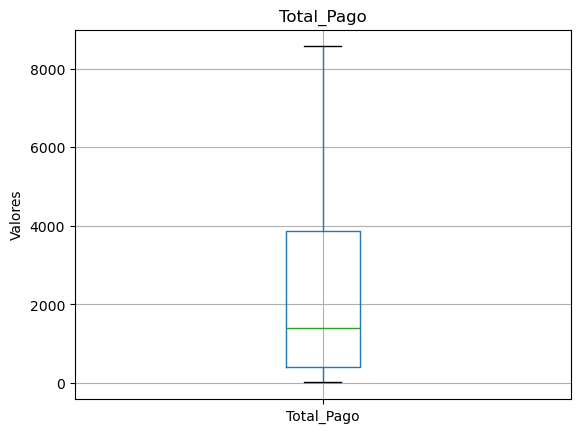

In [32]:
df.boxplot(column='Total_Pago')
plt.title('Total_Pago')
plt.ylabel('Valores')
plt.show()

#### O gráfico plotado acima me mostra que os valores da variável "Total_Pago" não estão bem distribuídos, o menor valor está bem próximo de 0 enquanto o maior valor ultrapassa os 8000, podemos concluir conforme antecipado analisando o describe() que existem dados elevando o valor da média, através do gráfico confirmei essa observação.

In [33]:
(df['Total_Pago'] >= 3867.162500).sum()

np.int64(622)

In [34]:
(df['Total_Pago'] >= 3867.162500).mean() * 100

np.float64(25.0)

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


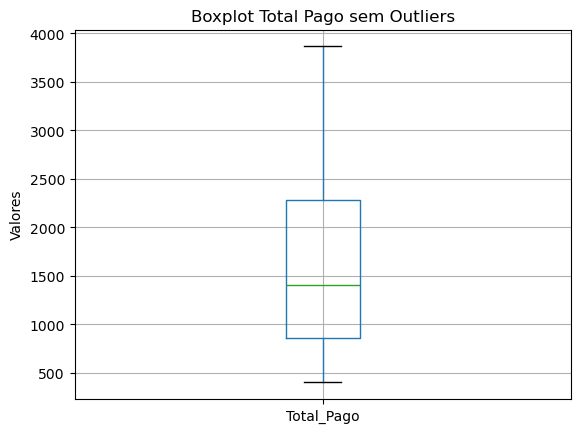

In [36]:
# Filtrando: (Coluna <= Máximo) E (Coluna >= Mínimo)
total_pago_sem_outliers = df[(df['Total_Pago'] <= 3867.162500) & (df['Total_Pago'] >= 402.337500)]

# Plotando
total_pago_sem_outliers.boxplot(column='Total_Pago')
plt.title('Boxplot Total Pago sem Outliers')
plt.ylabel('Valores')
plt.show()

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

In [ ]:
#Seu código aqui